# Iris, Wine Data -> GBM, XGBoost, Light GBM

In [3]:
from sklearn import datasets as d
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
import pandas as pd
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import time
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## (1) Iris data -> GBM, XGBoost, Light GBM

In [4]:
# import iris data
iris = d.load_iris()
irisdf=pd.DataFrame(iris.data)
irisdf.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(irisdf, iris.target, test_size=0.3, random_state=0)

### Iris - GBM

- GBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :   0.96   )[소수점 둘째자리까지]

In [33]:
# gbm

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)



print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

print('GBM 정확도: {0:.2f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.4f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9630
GBM 정확도: 0.96
GBM 수행 시간: 1553.6242 초


### Iris - XGBoost

- xgboostclassifier를 이용하여 iris data 분류 모델을 만들어 성능을 적고 ( 성능 :  0.98   )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 순서대로 나열하라(2 - 3 - 0 - 1)

In [8]:
# xgboostclassifier

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
print('성능 : ', np.round(accuracy_score(y_test , xgb_pred),2))

성능 :  0.98


[0]	validation_0-merror:0.022222
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.022222
[2]	validation_0-merror:0.022222
[3]	validation_0-merror:0.022222
[4]	validation_0-merror:0.022222
[5]	validation_0-merror:0.022222
[6]	validation_0-merror:0.022222
[7]	validation_0-merror:0.022222
[8]	validation_0-merror:0.022222
[9]	validation_0-merror:0.022222
[10]	validation_0-merror:0.022222
[11]	validation_0-merror:0.022222
[12]	validation_0-merror:0.022222
[13]	validation_0-merror:0.022222
[14]	validation_0-merror:0.022222
[15]	validation_0-merror:0.022222
[16]	validation_0-merror:0.022222
[17]	validation_0-merror:0.022222
[18]	validation_0-merror:0.022222
[19]	validation_0-merror:0.022222
[20]	validation_0-merror:0.022222
[21]	validation_0-merror:0.022222
[22]	validation_0-merror:0.022222
[23]	validation_0-merror:0.022222
[24]	validation_0-merror:0.022222
[25]	validation_0-merror:0.022222
[26]	validation_0-merror:0.022222
[27]	validation_0-merror

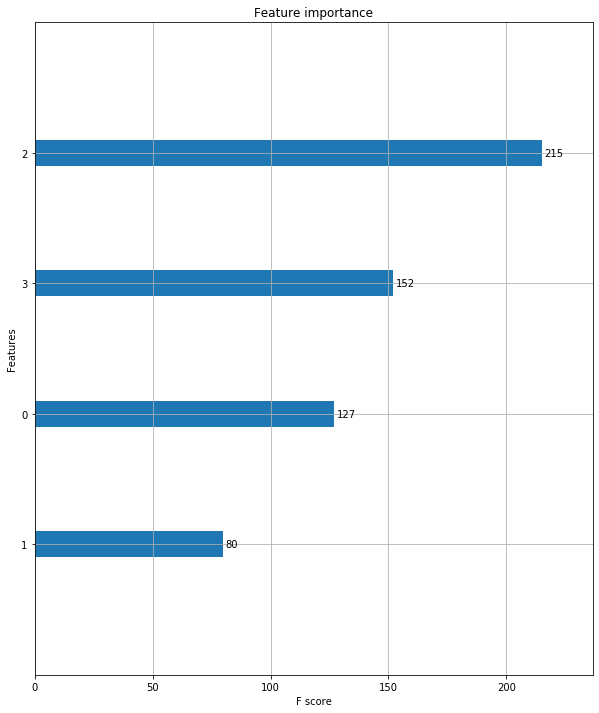

In [21]:
#plot_importance graph

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb_model = XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=evals, verbose = True, early_stopping_rounds = 100)
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

### Iris - Light GBM

- LightGBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :  0.98    )[소수점 둘째자리까지]

In [22]:
# lgbm

lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)


print('성능 : ', round(accuracy_score(y_test , lgbm_pred),2))

성능 :  0.98


## (2) wine data -> GBM, XGBoost, Light GBM

In [23]:
# import wine data
wine = d.load_wine()
winedf=pd.DataFrame(wine.data)
winedf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [24]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(winedf, wine.target, test_size=0.3, random_state=0)

### Wine - GBM

- GBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 :  0.96   )[소수점 둘째자리까지]

In [27]:
# gbm

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

gb_accuracy_round = round(gb_accuracy,2)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 성능 : {0: .4f}'.format(gb_accuracy_round))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9630
GBM 성능 :  0.9600
GBM 수행 시간: 1300.2 초


### Wine - XGBoost

- xgboostclassifier를 이용하여 wine data 분류 모델을 만들어 성능을 적고 ( 성능 : 0.96     )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 4개를 순서대로 나열하라(9-12-6-4)

In [31]:
# xgboost

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)



print('성능 : ', round(accuracy_score(y_test , xgb_pred), 2))

print('성능 : ', accuracy_score(y_test , xgb_pred))

성능 :  0.96
성능 :  0.9629629629629629


[0]	validation_0-merror:0.037037
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.037037
[2]	validation_0-merror:0.037037
[3]	validation_0-merror:0.037037
[4]	validation_0-merror:0.037037
[5]	validation_0-merror:0.037037
[6]	validation_0-merror:0.037037
[7]	validation_0-merror:0.037037
[8]	validation_0-merror:0.037037
[9]	validation_0-merror:0.037037
[10]	validation_0-merror:0.037037
[11]	validation_0-merror:0.037037
[12]	validation_0-merror:0.037037
[13]	validation_0-merror:0.037037
[14]	validation_0-merror:0.037037
[15]	validation_0-merror:0.037037
[16]	validation_0-merror:0.037037
[17]	validation_0-merror:0.037037
[18]	validation_0-merror:0.037037
[19]	validation_0-merror:0.037037
[20]	validation_0-merror:0.037037
[21]	validation_0-merror:0.037037
[22]	validation_0-merror:0.037037
[23]	validation_0-merror:0.037037
[24]	validation_0-merror:0.037037
[25]	validation_0-merror:0.037037
[26]	validation_0-merror:0.037037
[27]	validation_0-merror

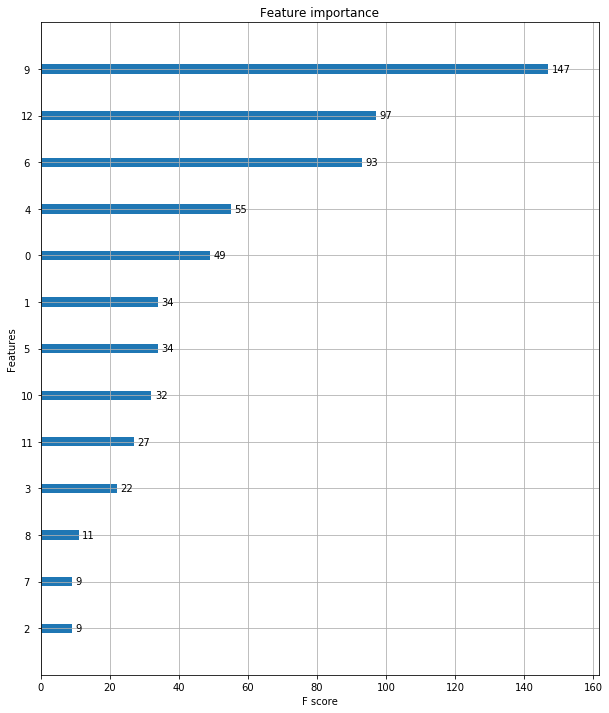

In [32]:
# plot_importance graph

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True, early_stopping_rounds=100)
w_preds=xgb_wrapper.predict(X_test)


f, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

### Wine - LightGBM

- LightGBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 :   0.94   )[소수점 둘째자리까지]

In [29]:
# lgbm

lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

print('성능 : ', round(accuracy_score(y_test , lgbm_pred), 2))

성능 :  0.94
